## Data Science 101 - Data Analysis on the Iris Dataset
This practical is a guide for exploratory data analysis and simple modeling on the iris dataset (https://www.kaggle.com/datasets/uciml/iris?resource=download). It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.  

In [6]:
# Import required libraries
import pandas as pd #pandas is a python library for data analysis and manipulation
import seaborn as sns 
import matplotlib.pyplot as plt

## Load Data

In [15]:

iris = pd.read_csv("Iris.csv")
iris.drop(["Id"], axis =1, inplace=True) # remove the Id column as it won't be used
iris.head() #show the first five rows of data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Questions: 
1. Is this a supervised or an unsupervised data set if we want to predict the iris species?
2. If we want to build a model to find the iris species, what type of machine learning could we use?
   - a) Regression
   - b) Classification
   - c) Clustering
   - d) B and C
   - e) A and B 

## Data Pre-processing and Data Exploration
Run the code cells below and analyse the outputs.

In [3]:
# What are the different iris species? How many examples are there of each species?
iris["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [12]:
# Summary of the data
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
# Get some more information about the dataset
iris.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Questions:

3. Is the iris dataset balanced? (y/n)
4. How many data points are in the dataset?
5. What is the average petal length across all iris species?
6. Is there any missing data in this dataset?

## Data Exploration

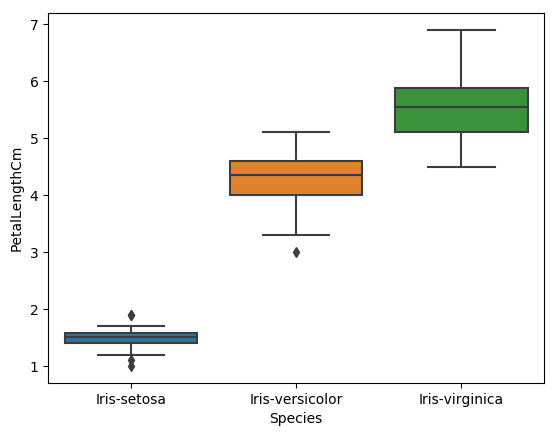

In [16]:

# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

#TODO - try changing the y variable to get the box plots for other measures.

Questions:
7. Are there any outliers in the data?

c:\Users\danielle.winter\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


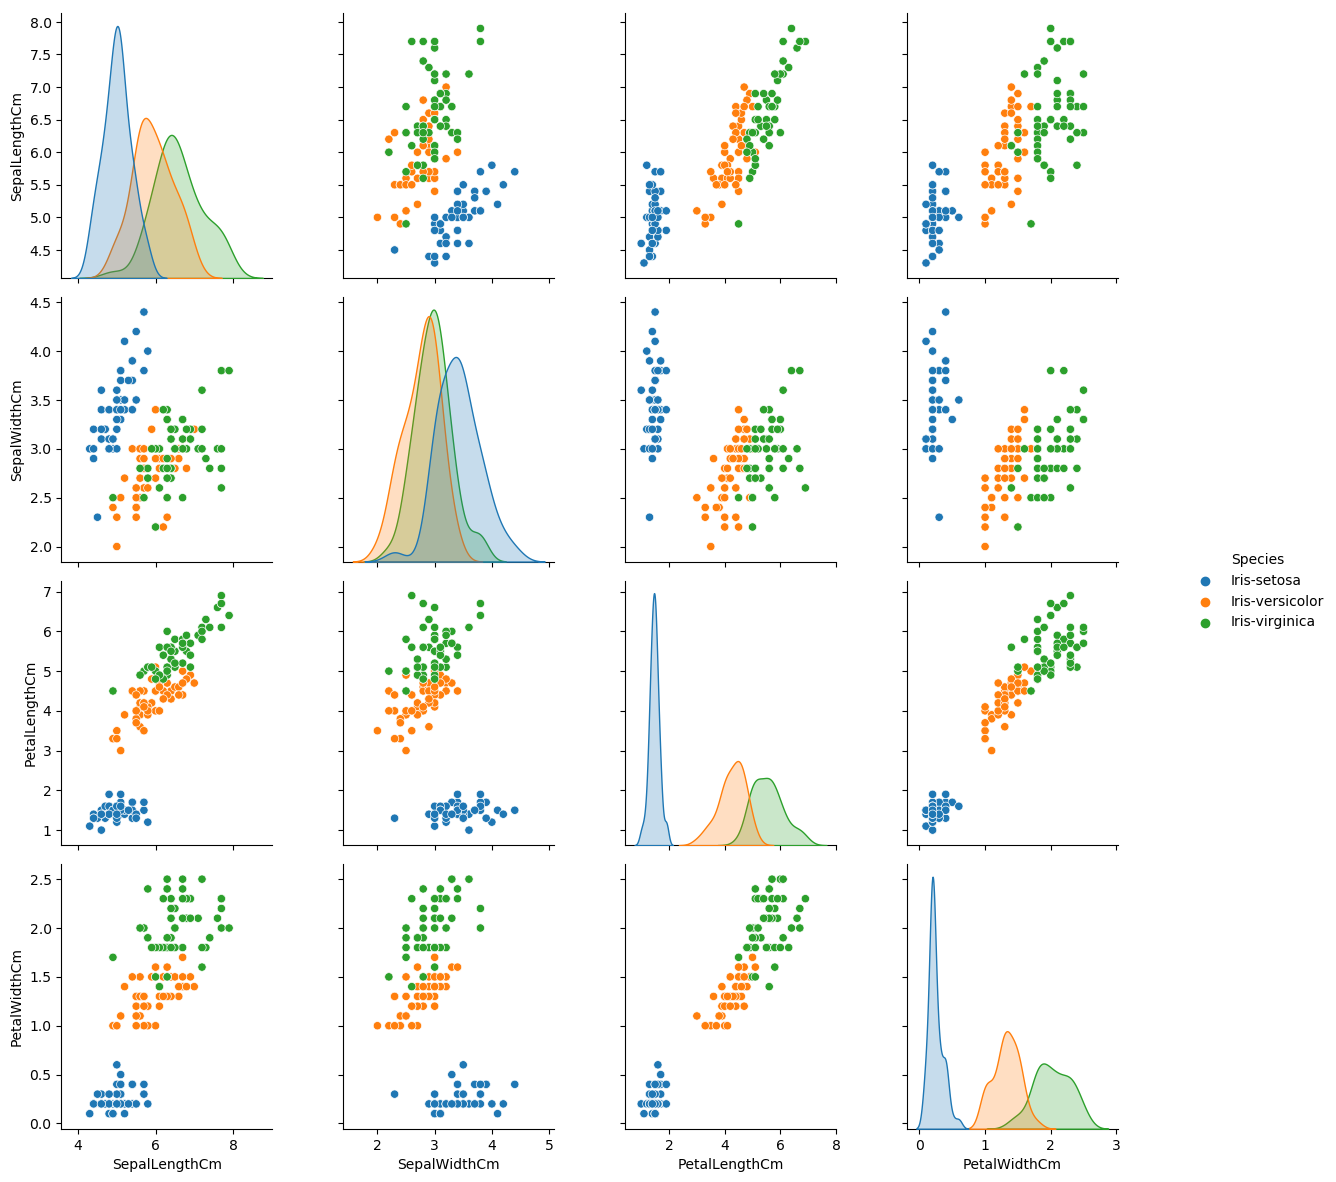

In [18]:
# Another useful seaborn plot is the pairplot, which shows the bivariate (2 variable comparison) relation
# between each pair of features.

sns.pairplot(iris, hue="Species", size=3)

#TODO spend some time discussing these plots

Questions:
8. From the pairplot, which iris species is separated from the other two across all feature combinations?